In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve, recall_score

In [2]:
train_df=pd.read_csv('train.csv')

In [3]:
test_df=pd.read_csv('test.csv')

In [4]:
train_df.shape

(891, 12)

In [5]:
test_df.shape

(418, 11)

In [6]:
final_df=pd.concat([train_df,test_df],axis=0)

In [7]:
final_df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [8]:
final_df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [9]:
final_df.drop(['Cabin'],axis=1,inplace=True)
final_df.drop(['Ticket'],axis=1,inplace=True)

In [10]:
final_df["Age"]=final_df["Age"].fillna(final_df["Age"].mean())
final_df["Fare"]=final_df["Fare"].fillna(final_df["Fare"].mean())

In [11]:
final_df['Embarked']=final_df['Embarked'].fillna(final_df['Embarked'].mode()[0])

In [12]:
final_df.isnull().sum()

Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
dtype: int64

In [13]:
final_df.set_index('PassengerId')

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived
PassengerId,,,,,,,,,
1,22.000000,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0
2,38.000000,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0
3,26.000000,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0
4,35.000000,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0
5,35.000000,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0
...,...,...,...,...,...,...,...,...,...
1305,29.881138,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,NaN
1306,39.000000,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,female,0,NaN
1307,38.500000,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,male,0,NaN


<AxesSubplot:xlabel='Age'>

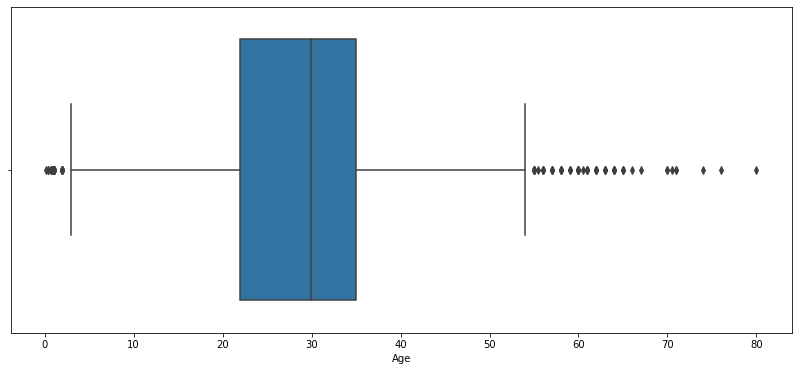

In [14]:
plt.figure(figsize=(14, 6))                                                      
sns.boxplot(x='Age',data=final_df)

<AxesSubplot:xlabel='SibSp'>

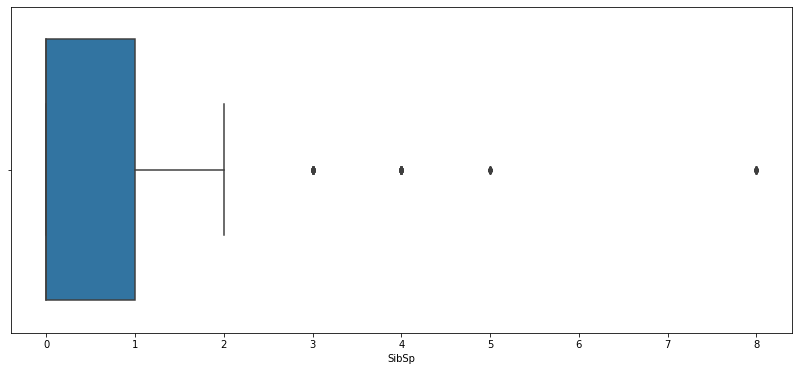

In [15]:
plt.figure(figsize=(14, 6))                                                      
sns.boxplot(x='SibSp',data=final_df)

<AxesSubplot:xlabel='Parch'>

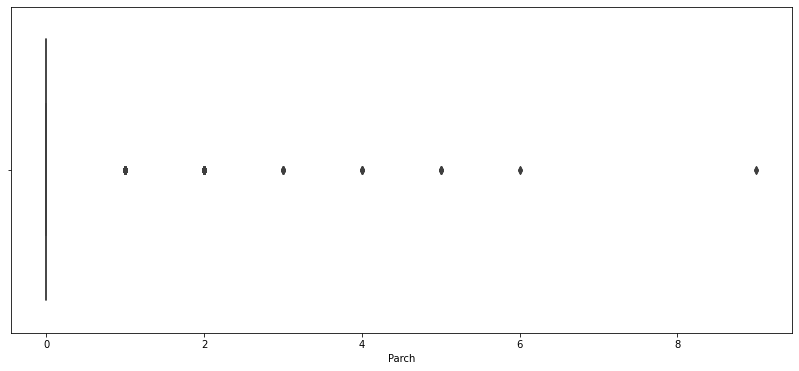

In [16]:
plt.figure(figsize=(14, 6))                                                      
sns.boxplot(x='Parch',data=final_df)

<AxesSubplot:xlabel='Fare'>

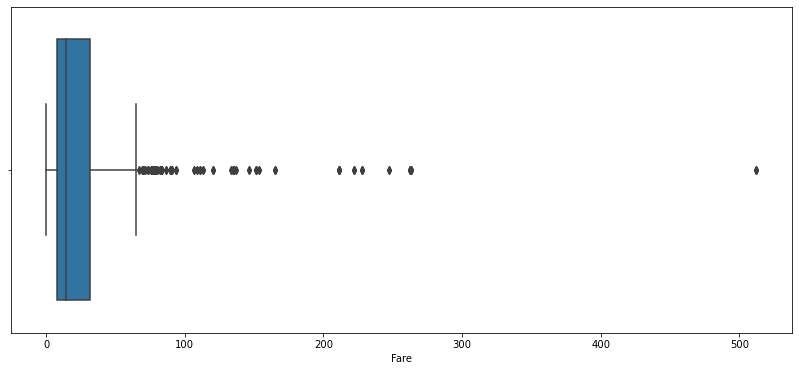

In [17]:
plt.figure(figsize=(14, 6))                                                      
sns.boxplot(x='Fare',data=final_df)

In [18]:
final_df = final_df[(final_df['Age']<68)]
final_df = final_df[(final_df['SibSp']<2)]
final_df = final_df[(final_df['Parch']<2)]
final_df = final_df[(final_df['Fare']<180)]

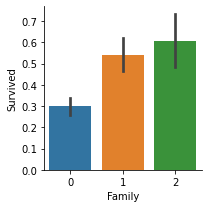

In [19]:
final_df["Family"] = final_df["SibSp"] + final_df["Parch"]
sns.factorplot(x="Family", y ="Survived", data=final_df, kind="bar", size=3)
plt.show()

In [20]:
final_df[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean()

,Sex,Survived
0,female,0.787879
1,male,0.184524


In [21]:
final_df["Alone"] = [1 if i == 0 else 0 for i in final_df["Family"]]
final_df["Family"].replace([0,1,2,3,4,5,6,7,10], [0,1,1,1,0,2,0,2,2], inplace=True)
final_df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family,Alone
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,1,0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,1,0
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,0,1
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,1,0
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,0,1


In [22]:
final_df['Title']=final_df.Name.str.extract('([A-Za-z]+)\.')

In [23]:
final_df['Title'].replace(['Mme','Ms','Mlle','Lady','Countess','Dona','Dr','Major','Sir','Capt','Don','Rev','Col', 'Jonkheer'],
                      ['Miss','Miss','Miss','Mrs','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Other','Other','Other'], inplace=True)

In [24]:
final_df["Title"].replace(["Mr","Mrs","Miss","Master","Other"], [1,2,2,3,1], inplace=True)

In [25]:
final_df['Age_Limit']=pd.cut(final_df['Age'], 5)
final_df.groupby(['Age_Limit'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Age_Limit,
"(0.354, 13.536]",0.88
"(13.536, 26.652]",0.32381
"(26.652, 39.768]",0.364641
"(39.768, 52.884]",0.397959
"(52.884, 66.0]",0.35


In [26]:
final_df['Age_Limit'] = LabelEncoder().fit_transform(final_df['Age_Limit'])

In [27]:
final_df['Fare_Limit']=pd.qcut(final_df['Fare'],4)
final_df.groupby(['Fare_Limit'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Limit,
"(-0.001, 7.875]",0.220339
"(7.875, 12.475]",0.244898
"(12.475, 26.288]",0.407821
"(26.288, 164.867]",0.628415


In [28]:
final_df['Fare_Limit'] = LabelEncoder().fit_transform(final_df['Fare_Limit'])

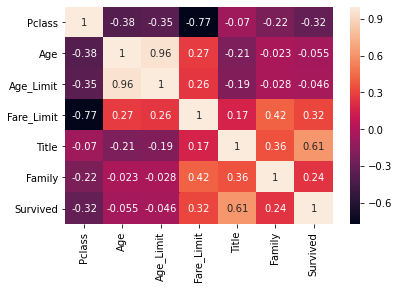

In [29]:
sns.heatmap(final_df[["Pclass","Embarked","Sex","Age","Age_Limit","Fare_Limit", "Title","Family", "Survived"]].corr(), annot = True)
plt.show()

In [30]:
final_df['Age']=final_df['Age'].astype(int)

In [31]:
final_df

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family,Alone,Title,Age_Limit,Fare_Limit
0,22,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,1,0,1,1,0
1,38,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,1,0,2,2,3
2,26,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,0,1,2,1,1
3,35,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,1,0,2,2,3
4,35,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,29,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,0,1,1,2,1
414,39,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,0,1,2,2,3
415,38,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,0,1,1,2,0
416,29,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,0,1,1,2,1


In [32]:
final_df.drop(labels=["SibSp","Parch","Fare","Age","Name", "PassengerId"], axis=1, inplace = True)
final_df.head()

,Embarked,Pclass,Sex,Survived,Family,Alone,Title,Age_Limit,Fare_Limit
0,S,3,male,0.0,1,0,1,1,0
1,C,1,female,1.0,1,0,2,2,3
2,S,3,female,1.0,0,1,2,1,1
3,S,1,female,1.0,1,0,2,2,3
4,S,3,male,0.0,0,1,1,2,1


In [33]:
final_df = pd.get_dummies(final_df,columns=["Pclass"])
final_df = pd.get_dummies(final_df,columns=["Embarked"])
final_df = pd.get_dummies(final_df,columns=["Family"])
final_df = pd.get_dummies(final_df,columns=["Age_Limit"])
final_df = pd.get_dummies(final_df,columns=["Fare_Limit"])
final_df = pd.get_dummies(final_df,columns=["Title"])
final_df = pd.get_dummies(final_df,columns=["Sex"])


final_df.head()

,Survived,Alone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Family_0,Family_1,...,Age_Limit_4,Fare_Limit_0,Fare_Limit_1,Fare_Limit_2,Fare_Limit_3,Title_1,Title_2,Title_3,Sex_female,Sex_male
0,0.0,0,0,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
1,1.0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0
2,1.0,1,0,0,1,0,0,1,1,0,...,0,0,1,0,0,0,1,0,1,0
3,1.0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,1,0
4,0.0,1,0,0,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1


In [34]:
final_df.shape

(1081, 24)

In [35]:
df_Train=final_df.iloc[:663,:]
df_Test=final_df.iloc[663:,:]

In [36]:
df_Train.isnull().sum()

Survived        0
Alone           0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Family_0        0
Family_1        0
Age_Limit_0     0
Age_Limit_1     0
Age_Limit_2     0
Age_Limit_3     0
Age_Limit_4     0
Fare_Limit_0    0
Fare_Limit_1    0
Fare_Limit_2    0
Fare_Limit_3    0
Title_1         0
Title_2         0
Title_3         0
Sex_female      0
Sex_male        0
dtype: int64

In [37]:
df_Test.isnull().sum()

Survived        346
Alone             0
Pclass_1          0
Pclass_2          0
Pclass_3          0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Family_0          0
Family_1          0
Age_Limit_0       0
Age_Limit_1       0
Age_Limit_2       0
Age_Limit_3       0
Age_Limit_4       0
Fare_Limit_0      0
Fare_Limit_1      0
Fare_Limit_2      0
Fare_Limit_3      0
Title_1           0
Title_2           0
Title_3           0
Sex_female        0
Sex_male          0
dtype: int64

In [38]:
df_Train.shape

(663, 24)

In [39]:
df_Test.shape

(418, 24)

In [40]:
df_Test.drop(['Survived'],axis=1,inplace=True)

In [41]:
X1=df_Train.drop(labels=['Survived'],axis=1)
Y1=df_Train['Survived']

In [42]:
X1

,Alone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Family_0,Family_1,Age_Limit_0,...,Age_Limit_4,Fare_Limit_0,Fare_Limit_1,Fare_Limit_2,Fare_Limit_3,Title_1,Title_2,Title_3,Sex_female,Sex_male
0,0,0,0,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
2,1,0,0,1,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
3,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
4,1,0,0,1,0,0,1,1,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,1,0
803,0,0,0,1,1,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,1
804,1,0,0,1,0,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
805,1,0,0,1,0,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [43]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.2,random_state=2)
print(X1_train.shape,X1_test.shape,Y1_train.shape,Y1_test.shape)

(530, 23) (133, 23) (530,) (133,)


In [44]:
#fit the model on train data 
log_reg1 = LogisticRegression().fit(X1_train, Y1_train)

#predict on train 
train_preds1 = log_reg1.predict(X1_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y1_train, train_preds1))

#predict on test
test_preds1 = log_reg1.predict(X1_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y1_test, test_preds1))
print('-'*50)

#We got good accuracy which means our model is performing quite well 
#ROC 
print("ROC score on train is: ", roc_auc_score(Y1_train, train_preds1))
print("ROC score on test is: ", roc_auc_score(Y1_test, test_preds1))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y1_train, train_preds1))
print("confusion_matrix test is: ", confusion_matrix(Y1_test, test_preds1))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y1_test !=test_preds1).sum(),'/',((Y1_test == test_preds1).sum()+(Y1_test != test_preds1).sum()))
print('-'*50)

# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(Y1_test,test_preds1))

Model accuracy on train is:  0.8169811320754717
Model accuracy on test is:  0.8421052631578947
--------------------------------------------------
ROC score on train is:  0.7949116101290015
ROC score on test is:  0.8132842334969994
--------------------------------------------------
confusion_matrix train is:  [[289  33]
 [ 64 144]]
confusion_matrix test is:  [[83 11]
 [10 29]]
Wrong predictions out of total
--------------------------------------------------
21 / 133
--------------------------------------------------
KappaScore is:  0.6219033437119263


In [45]:
#fit the model on train data 
NB=GaussianNB()
NB.fit(X1_train,Y1_train)

#predict on train 
train_preds2 = NB.predict(X1_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y1_train, train_preds2))

#predict on test
test_preds2 = NB.predict(X1_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y1_test, test_preds2))
print('-'*50)

#We got good accuracy which means our model is performing quite well 
#ROC 
print("ROC score on train is: ", roc_auc_score(Y1_train, train_preds2))
print("ROC score on test is: ", roc_auc_score(Y1_test, test_preds2))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y1_train, train_preds2))
print("confusion_matrix test is: ", confusion_matrix(Y1_test, test_preds2))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y1_test !=test_preds2).sum(),'/',((Y1_test == test_preds2).sum()+(Y1_test != test_preds2).sum()))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y1_test,test_preds2))

Model accuracy on train is:  0.809433962264151
Model accuracy on test is:  0.8646616541353384
--------------------------------------------------
ROC score on train is:  0.7776367654085046
ROC score on test is:  0.8217403164211674
--------------------------------------------------
confusion_matrix train is:  [[298  24]
 [ 77 131]]
confusion_matrix test is:  [[87  7]
 [11 28]]
Wrong predictions out of total
--------------------------------------------------
18 / 133
--------------------------------------------------
KappaScore is:  0.6633858267716535


In [46]:
train_prediction=NB.predict(df_Test)

In [47]:
train_prediction

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0.

In [48]:
df_Test['Survived'] = train_prediction

In [49]:
df_Test['Survived']=df_Test['Survived'].astype(int)

In [50]:
df_Test['Survived']

807    0
808    0
809    1
810    0
811    0
      ..
413    0
414    1
415    0
416    0
417    1
Name: Survived, Length: 418, dtype: int32

In [51]:
submissiondf=pd.read_csv('gender_submission.csv')

In [52]:
submissiondf.drop(['Survived'],inplace=True,axis=1)

In [53]:
submissiondf

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [54]:
mysub=pd.concat([submissiondf['PassengerId'],df_Test['Survived']],axis=1)

In [55]:
mysub

,PassengerId,Survived
0,892.0,0.0
1,893.0,1.0
2,894.0,0.0
3,895.0,0.0
4,896.0,1.0
...,...,...
884,NaN,0.0
886,NaN,0.0
887,NaN,1.0
889,NaN,0.0


In [56]:
mysub=mysub.iloc[:418,:]

In [57]:
mysub['Survived'] = mysub['Survived'].fillna(0)

In [58]:
mysub['Survived']=mysub['Survived'].astype(int)

In [59]:
mysub['PassengerId']=mysub['PassengerId'].astype(int)

In [60]:
mysub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [61]:
mysub.to_csv('NB3rdtry.csv',index=False)

# XG Boost

In [62]:
import xgboost
clf=xgboost.XGBClassifier()

In [63]:
n_estimators = [100, 200, 400, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.01,0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4,5]
base_score=[0.05,0.15,0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

# Random search cv

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
random_cv = RandomizedSearchCV(estimator=clf,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=30,
            n_jobs = -1,
            verbose = True, 
            return_train_score = True)

In [66]:
random_cv.fit(X1,Y1)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   21.4s finished


[11:51:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                   

In [67]:
random_cv.best_estimator_

XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
clf=xgboost.XGBClassifier(base_score=0.15, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=2, missing=np.nan, monotone_constraints='()',
              n_estimators=1100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
clf.fit(X1,Y1)

[11:52:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.15, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=1100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
y_pred = clf.predict(X1_train)

In [71]:
submission=pd.concat([pd.Series(mysub.PassengerId),pd.Series(y_pred)],axis=1)
submission.columns = ['PassengerId','Survived']

In [72]:
submission.head()

,PassengerId,Survived
0,892.0,0.0
1,893.0,0.0
2,894.0,0.0
3,895.0,0.0
4,896.0,0.0


In [73]:
submission=submission.iloc[:418,:]

In [74]:
submission['Survived'] = submission['Survived'].fillna(0)

In [75]:
submission['Survived']=submission['Survived'].astype(int)

In [76]:
submission['PassengerId']=submission['PassengerId'].astype(int)

In [77]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,1
416,1308,0


In [78]:
submission.to_csv('submission_XGB.csv',index=False)

# Adaboost , Gradient boost classifier.

In [79]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis, RepeatedStratifiedKFold

In [80]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold

# All model accuracies.

In [81]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.2,random_state=2)

models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(max_iter=10000), 
          "Random Forest": RandomForestClassifier(),
          "SVC" : SVC(probability=True),
          "DecisionTreeClassifier" : DecisionTreeClassifier(),
          "AdaBoostClassifier" : AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(),
                   learning_rate=1.5, n_estimators=2, random_state=7),
          "GradientBoostingClassifier" : GradientBoostingClassifier(max_depth=4, max_features=0.3, min_samples_leaf=100,
                           n_estimators=300),
          "GaussianNB" : GaussianNB(),
          "LinearDiscriminantAnalysis" : LinearDiscriminantAnalysis(),
"QuadraticDiscriminantAnalysis" : QuadraticDiscriminantAnalysis()}
scores={}
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
np.random.seed(42)
model_scores = {}
for name, model in models.items():
    score=cross_val_score(model,X1_train,Y1_train,cv=cv,scoring='accuracy',n_jobs=-1)
    scores[name]=np.mean(score)
print(scores)

{'KNN': 0.7849056603773584, 'Logistic Regression': 0.8031446540880504, 'Random Forest': 0.779245283018868, 'SVC': 0.8113207547169812, 'DecisionTreeClassifier': 0.7930817610062895, 'AdaBoostClassifier': 0.7930817610062894, 'GradientBoostingClassifier': 0.8119496855345912, 'GaussianNB': 0.7905660377358489, 'LinearDiscriminantAnalysis': 0.8163522012578617, 'QuadraticDiscriminantAnalysis': 0.49937106918238994}


In [82]:
tar=LinearDiscriminantAnalysis()
tar.fit(X1_train,Y1_train)
m=tar.predict(X1_train)

In [83]:
submission=pd.concat([pd.Series(mysub.PassengerId),pd.Series(m)],axis=1)
submission.columns = ['PassengerId','Survived']

In [84]:
submission

,PassengerId,Survived
0,892.0,0.0
1,893.0,0.0
2,894.0,0.0
3,895.0,1.0
4,896.0,0.0
...,...,...
525,NaN,0.0
526,NaN,0.0
527,NaN,0.0
528,NaN,1.0


In [85]:
submission=submission.iloc[:418,:]

In [86]:
submission['Survived'] = submission['Survived'].fillna(0)

In [87]:
submission['Survived']=submission['Survived'].astype(int)

In [88]:
submission['PassengerId']=submission['PassengerId'].astype(int)

In [89]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,1
416,1308,0


In [90]:
submission.to_csv('ver.csv',index=False)